# Transform the survey data for discrete choice models


This is to avoid duplicating work across modeling notebooks.

Transforms the choices data + relevant repondent level data into a dataset to use in models.

Saves the transformed data.


Reminder about parameter coding: 
- drone choice=1
- ground choice=0

In [3]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read in:
sample_data_filepath = '../data/sample-preprocessed.csv'
# save to:
transformed_data_filepath = './choice-model-data-long.csv'

In [5]:
sample_df = pd.read_csv(sample_data_filepath, dtype='str')
sample_df.head(3)

,Duration (in seconds),RecordedDate,ResponseId,Q_online_shopping,Q_takeout_food,Q_online_groceries,Q_v_0_why_no,Q_v_0_why_no_4_TEXT,Q_v_1,Q_v_1_why_no,...,Q_state,Q_comments,STUDY_ID,online_shopping,takeout_food_delivery,online_groceries,prescription_medications_delivery,last_minute_groceries_delivery,liquor_store_delivery,questions_asked
0,215,2022-09-12 09:25:01,R_3dNdOyEHwO3X5Tg,2,1,4,NaN,NaN,1,NaN,...,31,NaN,631f4adf9c7bc459e1650eb6,True,True,True,True,True,True,NaN
1,176,2022-09-12 09:29:21,R_1r7Zvnp6IL6dFXo,3,4,5,NaN,NaN,1,NaN,...,5,NaN,631f4adf9c7bc459e1650eb7,True,True,False,True,False,True,NaN
2,358,2022-09-12 09:29:38,R_1JIXl9IZdC0IxJt,2,4,4,NaN,NaN,3,NaN,...,11,NaN,631f4adf9c7bc459e1650eb7,True,True,True,True,True,True,NaN


In [6]:
# print(list(sample_df.columns))

In [7]:
choice_Qs = [q for q in sample_df.columns if (q.startswith('CHOICE_'))]
# Expect 800, representing 400, because of how survey was constructed in Qualtrics
print('%s total choice questions' % len(choice_Qs))
# print(choice_Qs)
sample_df[choice_Qs].drop([1]).head(3)

800 total choice questions


,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt1_dc1_dt0_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp1_1,CHOICE_v0_gc0_gt2_dc0_dt1_dp0_1,CHOICE_v0_gc0_gt2_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt2_dc1_dt0_dp1_1,CHOICE_v0_gc0_gt2_dc1_dt2_dp1_1,...,CHOICE_v3_gc3_gt2_dc1_dt2_dp1_1.1,CHOICE_v3_gc3_gt2_dc2_dt2_dp1_1.1,CHOICE_v3_gc3_gt2_dc3_dt0_dp1_1.1,CHOICE_v3_gc3_gt2_dc3_dt1_dp0_1.1,CHOICE_v3_gc3_gt2_dc3_dt3_dp0_1.1,CHOICE_v3_gc3_gt2_dc3_dt3_dp1_1.1,CHOICE_v3_gc3_gt3_dc2_dt3_dp0_1.1,CHOICE_v3_gc3_gt3_dc3_dt1_dp1_1.1,CHOICE_v3_gc3_gt3_dc3_dt2_dp1_1.1,CHOICE_v3_gc3_gt3_dc3_dt3_dp0_1.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
non_choice_Qs = [q for q in sample_df.columns if (q.startswith('Q-') or q.startswith('Q_'))]
print('non-choice questions:\n', list(non_choice_Qs))
sample_df[non_choice_Qs].drop([1]).head(3)

non-choice questions:
 ['Q_online_shopping', 'Q_takeout_food', 'Q_online_groceries', 'Q_v_0_why_no', 'Q_v_0_why_no_4_TEXT', 'Q_v_1', 'Q_v_1_why_no', 'Q_v_1_why_no_4_TEXT', 'Q_v_2', 'Q_v_2_why_no', 'Q_v_2_why_no_4_TEXT', 'Q_gender', 'Q_age', 'Q_race', 'Q_income', 'Q_urban_rural', 'Q_residence_type', 'Q_residence_type_3_TEXT', 'Q_state', 'Q_comments']


,Q_online_shopping,Q_takeout_food,Q_online_groceries,Q_v_0_why_no,Q_v_0_why_no_4_TEXT,Q_v_1,Q_v_1_why_no,Q_v_1_why_no_4_TEXT,Q_v_2,Q_v_2_why_no,Q_v_2_why_no_4_TEXT,Q_gender,Q_age,Q_race,Q_income,Q_urban_rural,Q_residence_type,Q_residence_type_3_TEXT,Q_state,Q_comments
0,2,1,4,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,2,"1,7",7,1,2,NaN,31,NaN
2,2,4,4,NaN,NaN,3,NaN,NaN,1,NaN,NaN,2,4,1,2,2,1,NaN,11,NaN
3,3,4,4,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,3,1,4,3,1,NaN,10,no


### Codebook

In [9]:
from codebook import codebook

# codebook

### Transform data

#### Transform wide data into long data

In [10]:
# Wide data
sample_df[['ResponseId']+choice_Qs].head(3)

,ResponseId,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt1_dc1_dt0_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp1_1,CHOICE_v0_gc0_gt2_dc0_dt1_dp0_1,CHOICE_v0_gc0_gt2_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt2_dc1_dt0_dp1_1,...,CHOICE_v3_gc3_gt2_dc1_dt2_dp1_1.1,CHOICE_v3_gc3_gt2_dc2_dt2_dp1_1.1,CHOICE_v3_gc3_gt2_dc3_dt0_dp1_1.1,CHOICE_v3_gc3_gt2_dc3_dt1_dp0_1.1,CHOICE_v3_gc3_gt2_dc3_dt3_dp0_1.1,CHOICE_v3_gc3_gt2_dc3_dt3_dp1_1.1,CHOICE_v3_gc3_gt3_dc2_dt3_dp0_1.1,CHOICE_v3_gc3_gt3_dc3_dt1_dp1_1.1,CHOICE_v3_gc3_gt3_dc3_dt2_dp1_1.1,CHOICE_v3_gc3_gt3_dc3_dt3_dp0_1.1
0,R_3dNdOyEHwO3X5Tg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,R_1r7Zvnp6IL6dFXo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R_1JIXl9IZdC0IxJt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Transform the wide data to long data.
choices_df = pd.melt(
    sample_df[['ResponseId']+choice_Qs], 
    id_vars=['ResponseId'], value_vars=choice_Qs,
    var_name='QID', value_name='choice'
).dropna()
print('%s choice responses' % len(choices_df))
choices_df.head(3)    

36297 choice responses


,ResponseId,QID,choice
331,R_2DTxG8oxoUwagCE,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0
991,R_11jaEnzddsEMEAY,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0
1496,R_z28iJpRZr3tpK7L,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0


In [12]:
choices_df['choice'] = choices_df['choice'].astype(int)
choices_df['v'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_v')[1][0]))
choices_df['gc'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_gc')[1][0]))
choices_df['gt'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_gt')[1][0]))
choices_df['dc'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_dc')[1][0]))
choices_df['dt'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_dt')[1][0]))
choices_df['dp'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_dp')[1][0]))

choices_df.head(3)

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp
331,R_2DTxG8oxoUwagCE,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0
991,R_11jaEnzddsEMEAY,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0
1496,R_z28iJpRZr3tpK7L,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0


### Add demographic/consumer attributes of interest

Gender: male

Coded as: 
- male = 1
- otherwise = 0 (female/other/prefer not to answer)

In [13]:
# Add in gender.
# Code as: male=1; otherwise: 0
def map_male(g):
    return 1 if g==1 else 0

choices_df['male'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_gender'].astype(int).apply(map_male)
)

Race

Using the same variables as in the sample demographics notebook/reporting. i.e. they are aggregated in the same way.

Using dummy variables:
- race_white
- race_black
- race_asian
- race_other_or_mixed

In [30]:
# function used to aggregate demographics
def handle_races_combined(race):
    races = [r for r in race.split(',') if r != '6']
    if (len(races) != 1) or races[0] in ['3','5','7']:
        return 'Other or 2 or more races'
    return codebook['Q_race']['choices'][races[0]]

def map_race_white(race):
    races = [r for r in race.split(',') if r != '6']
    return 1 if races == ['1'] else 0

def map_race_black(race):
    races = [r for r in race.split(',') if r != '6']
    return 1 if races == ['2'] else 0

def map_race_asian(race):
    races = [r for r in race.split(',') if r != '6']
    return 1 if races == ['4'] else 0

def map_race_other_or_mixed(race):
    races = [r for r in race.split(',') if r != '6']
    return 1 if ((len(races) != 1) or races[0] in ['3','5','7']) else 0

choices_df['race_white'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_race'].apply(map_race_white)
)
choices_df['race_black'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_race'].apply(map_race_black)
)
choices_df['race_asian'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_race'].apply(map_race_asian)
)
choices_df['race_other_or_mixed'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_race'].apply(map_race_other_or_mixed)
)

Age

Using dummy variables for:
- age_young: 34 or younger
- age_old: 55 or older

In [32]:
# codebook['Q_age']

In [33]:
# Add in age as dummy variables

# age_young: 34 or younger
# age_old: 55 or older
def map_age_young(a):
    return 1 if a < 3 else 0

def map_age_old(a):
    return 1 if a > 4 else 0

choices_df['age_young'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_age'].astype(int).apply(map_age_young)
)
choices_df['age_old'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_age'].astype(int).apply(map_age_old)
)

Income level

Code with categories:

- lower income: Less than \$50,000
- medium income: \\$50,000 - $100,000
- higher income: \$100,000 or more

Where each category is a dummy variable

In [34]:
codebook['Q_income']

{'Q': 'What was your total household income in the previous year before taxes?',
 'choices': {'1': 'Less than \\$25,000',
  '2': '\\$25,000 to \\$49,999',
  '3': '\\$50,000 to $74,999',
  '4': '\\$75,000 to \\$99,999',
  '5': '\\$100,000 to $149,999',
  '6': '\\$150,000 to \\$199,999',
  '7': '\\$200,000 or more'}}

In [35]:
choices_df['income_lower'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_income'].astype(int).apply(lambda i: 1 if i <= 2 else 0)
)
choices_df['income_med'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_income'].astype(int).apply(lambda i: 1 if i in [3, 4] else 0)
)
choices_df['income_higher'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_income'].astype(int).apply(lambda i: 1 if i >=5 else 0)
)

Residential type

Dummy variables for:
- residence_house
- residence_apartment
- (some people may have said other -- no variable) 

In [36]:
codebook['Q_residence_type']

{'Q': 'What type of residence do you live in?',
 'choices': {'1': 'Private home', '2': 'Apartment', '3': 'Other'}}

In [37]:
def map_residence_house(r):
    return 1 if r==1 else 0

def map_residence_apartment(r):
    return 1 if r==2 else 0

choices_df['residence_house'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_residence_type'].astype(int).apply(map_residence_house)
)
choices_df['residence_apartment'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_residence_type'].astype(int).apply(map_residence_apartment)
)

Residential area

Dummy variables for:
- urban
- suburban
- rural

In [38]:
codebook['Q_urban_rural']

{'Q': 'Which best describes where you live?',
 'choices': {'1': 'Urban', '2': 'Suburban', '3': 'Rural', '4': "I don't know"}}

In [39]:
def map_urban(x):
    return 1 if x==1 else 0

def map_suburban(x):
    return 1 if x==2 else 0

def map_rural(x):
    return 1 if x==3 else 0

choices_df['urban'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_urban_rural'].astype(int).apply(map_urban)
)
choices_df['suburban'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_urban_rural'].astype(int).apply(map_suburban)
)
choices_df['rural'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_urban_rural'].astype(int).apply(map_rural)
)

Consumer behavior variables

Dummy variables for:
- freq_ecommerce: online shopping more than 1x/week
- freq_takeout_food: take-out food delivery more than 1x/week

In [40]:
# codebook['Q_online_shopping']
# codebook['Q_takeout_food']

In [41]:
def map_freq_ecommerce(x):
    return 1 if x==1 else 0

def map_freq_takeout_food(x):
    return 1 if x==1 else 0

choices_df['freq_ecommerce'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_online_shopping'].astype(int).apply(map_freq_ecommerce)
)
choices_df['freq_takeout_food'] = choices_df['ResponseId'].map(
    sample_df.set_index('ResponseId')['Q_takeout_food'].astype(int).apply(map_freq_takeout_food)
)

In [42]:
choices_df.head()

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,male,...,income_lower,income_med,income_higher,residence_house,residence_apartment,urban,suburban,rural,freq_ecommerce,freq_takeout_food
331,R_2DTxG8oxoUwagCE,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,1,0,0,1,0,0,0,1,0,0
991,R_11jaEnzddsEMEAY,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,1,0,0,0,1,0,1,0,0,0
1496,R_z28iJpRZr3tpK7L,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,0,1,0,1,0,0,1,0,0,0
2862,R_O10bMvBnywXUGc1,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,0,1,0,0,1,0,0,1,0,0
3025,R_2tzBgrR79AinJ6t,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,0,...,0,1,0,1,0,1,0,0,0,0


### Add values to the choice question parameters



In [43]:
import sys  
sys.path.insert(0, '../survey-questions')

from attributes import (
    VENDOR_TYPES, COST_LEVELS, TIME_LEVELS, DRONE_PRIVACY_LEVELS,
)
for levels in [VENDOR_TYPES, COST_LEVELS, TIME_LEVELS, DRONE_PRIVACY_LEVELS]:
    print(levels)

[('take-out food', 'take-out food'), ('prescription medications', 'prescription medications'), ('liquor store', 'items from a liquor store'), ('last-minute groceries', 'last-minute groceries')]
[[(0, '$0'), (1, '$1'), (3, '$3'), (5, '$5')], [(0, '$0'), (1, '$1'), (5, '$5'), (10, '$10')], [(0, '$0'), (1, '$1'), (3, '$3'), (5, '$5')], [(0, '$0'), (1, '$1'), (3, '$3'), (5, '$5')]]
[[(15, '15 minutes'), (20, '20 minutes'), (30, '30 minutes'), (45, '45 minutes')], [(30, '30 minutes'), (120, '2 hrs'), (360, '6 hrs'), (1440, '1 day')], [(15, '15 minutes'), (20, '20 minutes'), (30, '30 minutes'), (45, '45 minutes')], [(15, '15 minutes'), (20, '20 minutes'), (30, '30 minutes'), (45, '45 minutes')]]
[(0, 'NO privacy'), (1, 'YES privacy')]


In [44]:
choices_df['v_type'] = choices_df['v'].apply(lambda v: VENDOR_TYPES[v][0])
choices_df['g_cost'] = choices_df.apply(lambda row: COST_LEVELS[row['v']][row['gc']][0],axis=1)
choices_df['d_cost'] = choices_df.apply(lambda row: COST_LEVELS[row['v']][row['dc']][0],axis=1)
choices_df['g_time'] = choices_df.apply(lambda row: TIME_LEVELS[row['v']][row['gt']][0],axis=1)
choices_df['d_time'] = choices_df.apply(lambda row: TIME_LEVELS[row['v']][row['dt']][0],axis=1)
choices_df['d_privacy'] = choices_df.apply(lambda row: DRONE_PRIVACY_LEVELS[row['dp']][0],axis=1)
choices_df.head(3)

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,male,...,suburban,rural,freq_ecommerce,freq_takeout_food,v_type,g_cost,d_cost,g_time,d_time,d_privacy
331,R_2DTxG8oxoUwagCE,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,0,1,0,0,take-out food,0,0,15,30,0
991,R_11jaEnzddsEMEAY,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,1,0,0,0,take-out food,0,0,15,30,0
1496,R_z28iJpRZr3tpK7L,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,1,0,0,0,take-out food,0,0,15,30,0


Add in boolean columns indicating whether drone/ground vehicle cost is free

In [45]:
choices_df['g_free'] = choices_df['g_cost'].apply(lambda c: 1 if c==0 else 0)
choices_df['d_free'] = choices_df['d_cost'].apply(lambda c: 1 if c==0 else 0)

In [46]:
# add in extra for evaluating trade-offs
choices_df['d_time - g_time'] = choices_df['d_time'] - choices_df['g_time']
choices_df['d_cost - g_cost'] = choices_df['d_cost'] - choices_df['g_cost']
choices_df.head(3)

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,male,...,v_type,g_cost,d_cost,g_time,d_time,d_privacy,g_free,d_free,d_time - g_time,d_cost - g_cost
331,R_2DTxG8oxoUwagCE,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,take-out food,0,0,15,30,0,1,1,15,0
991,R_11jaEnzddsEMEAY,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,take-out food,0,0,15,30,0,1,1,15,0
1496,R_z28iJpRZr3tpK7L,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,0,0,0,0,0,2,0,1,...,take-out food,0,0,15,30,0,1,1,15,0


Add IDs for Biogeme models

In [47]:
# Biogeme can only work with respondent IDs as integers
# map respondent IDs to integers as the index where they appear
ids_map = {rid: i for i, rid in enumerate(sample_df['ResponseId'])}
choices_df['ID'] = choices_df['ResponseId'].map(ids_map)
# Also Biogeme requires the IDs to be sorted.
choices_df.sort_values(by='ID', inplace=True)
# ids_map

## Save the transformed data

In [48]:
print('saving transformed long data to file %s' % transformed_data_filepath)
choices_df.to_csv(transformed_data_filepath, index=False)
print('...saved')

saving transformed long data to file ./choice-model-data-long.csv
...saved


## Reread the data and show some stuff

In [49]:
choices_df = pd.read_csv(transformed_data_filepath)
choices_df.head()

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,male,...,g_cost,d_cost,g_time,d_time,d_privacy,g_free,d_free,d_time - g_time,d_cost - g_cost,ID
0,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc0_gt1_dc0_dt0_dp0_1.1,1,2,0,1,0,0,0,1,...,0,0,20,15,0,1,1,-5,0,0
1,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc2_gt1_dc0_dt1_dp0_1.1,1,2,2,1,0,1,0,1,...,3,0,20,20,0,0,1,0,-3,0
2,R_3dNdOyEHwO3X5Tg,CHOICE_v0_gc0_gt3_dc2_dt1_dp0_1.1,0,0,0,3,2,1,0,1,...,0,3,45,20,0,1,0,-25,3,0
3,R_3dNdOyEHwO3X5Tg,CHOICE_v1_gc3_gt0_dc0_dt2_dp0_1.1,1,1,3,0,0,2,0,1,...,10,0,30,360,0,0,1,330,-10,0
4,R_3dNdOyEHwO3X5Tg,CHOICE_v2_gc3_gt3_dc0_dt3_dp0_1.1,1,2,3,3,0,3,0,1,...,5,0,45,45,0,0,1,0,-5,0


In [50]:
color_ground = 'blue'
color_drone = 'red'

def plot_points_tradeoff_by_size(df, vendor):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    for dp, privacy in enumerate(DRONE_PRIVACY_LEVELS):
        ax = axes[dp]
        df_p = df[df['dp']==dp]
        df_p_agg = df_p[df_p['choice']==0].groupby(
            ['d_time - g_time','d_cost - g_cost']
        )['ResponseId'].count().rename('ground').to_frame()
        df_p_agg['drone'] = df_p_agg.index.map(df_p[df_p['choice']==1].groupby(
            ['d_time - g_time','d_cost - g_cost']
        )['ResponseId'].count())
        df_p_agg = df_p_agg.reset_index()
        ax.scatter(
            df_p_agg['d_time - g_time'],
            df_p_agg['d_cost - g_cost'],
            df_p_agg['ground'],
            color=color_ground, alpha=0.5, label='choice: ground vehicle',
            marker='o',
        )
        ax.scatter(
            df_p_agg['d_time - g_time'],
            df_p_agg['d_cost - g_cost'],
            df_p_agg['drone'],
            color=color_drone, alpha=0.5, label='choice: drone',
            marker='o',
        )   
        ax.set_xlabel('drone wait time - ground vehicle wait time (mins)')
        ax.set_ylabel('drone cost - ground vehicle cost (\$)')
        ax.axvline(c='grey', lw=1)
        _ = ax.axhline(c='grey', lw=1)
        _ = ax.set_title(privacy[1])
        ax.legend()
    title = ('%s: Ground vehicle vs Drone choice differences w.r.t. cost and time' % vendor)
    _ = fig.suptitle(title)

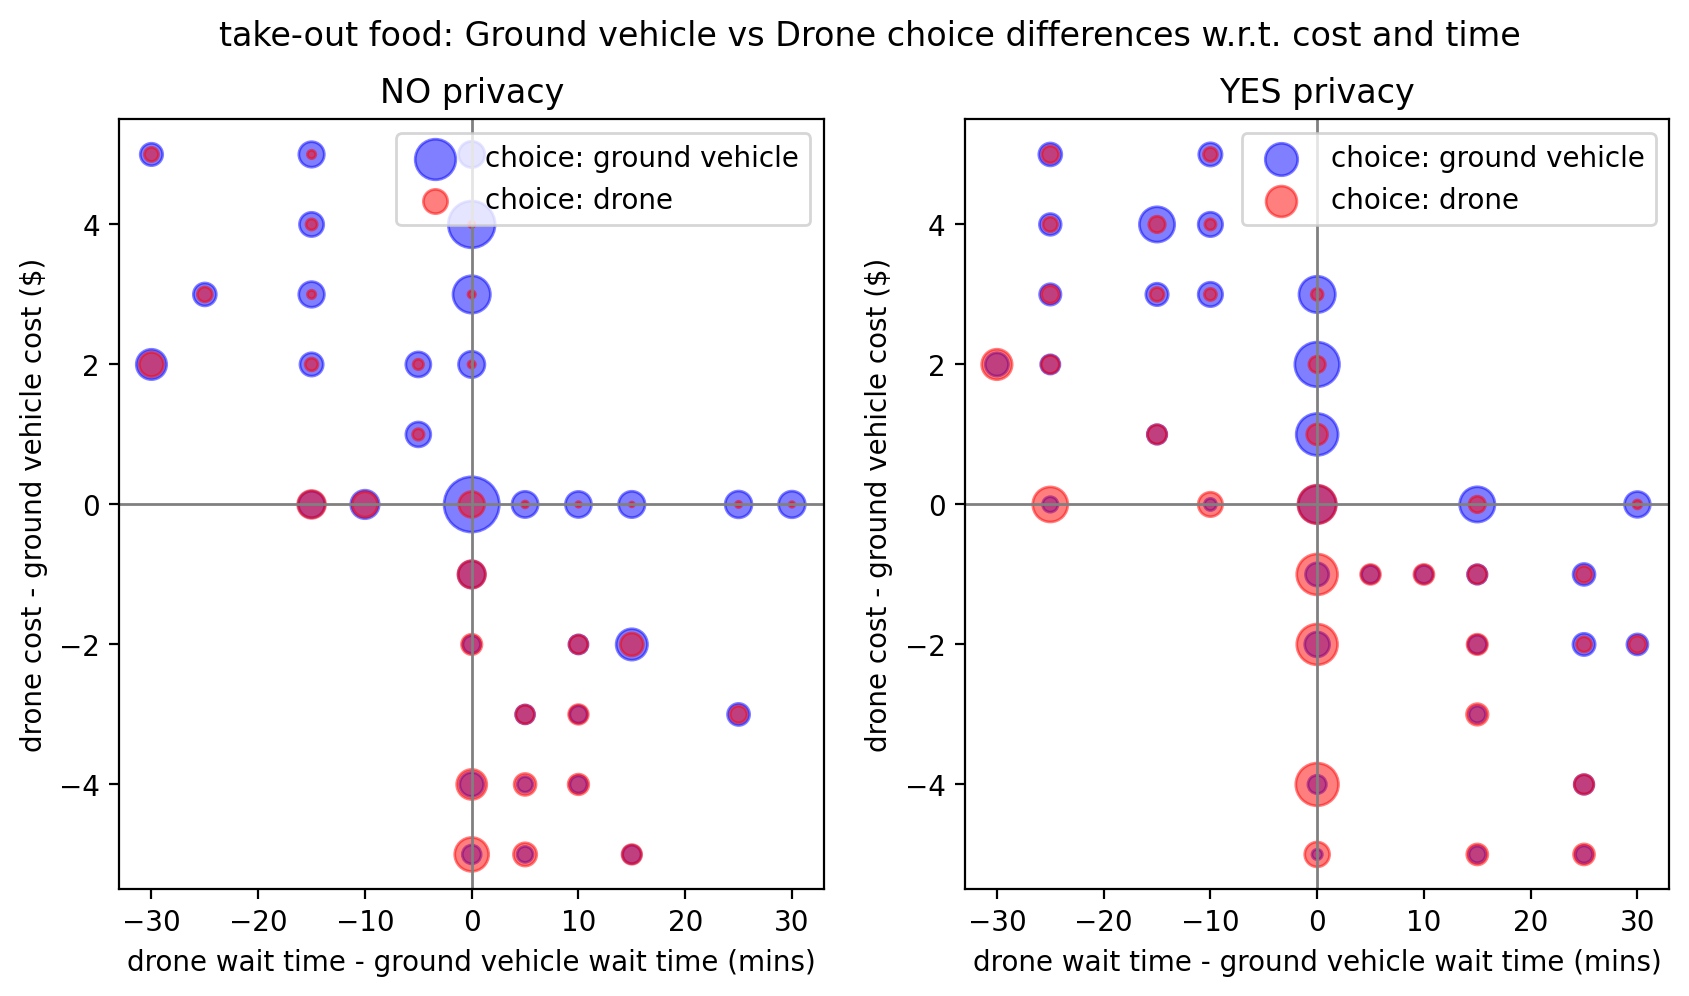

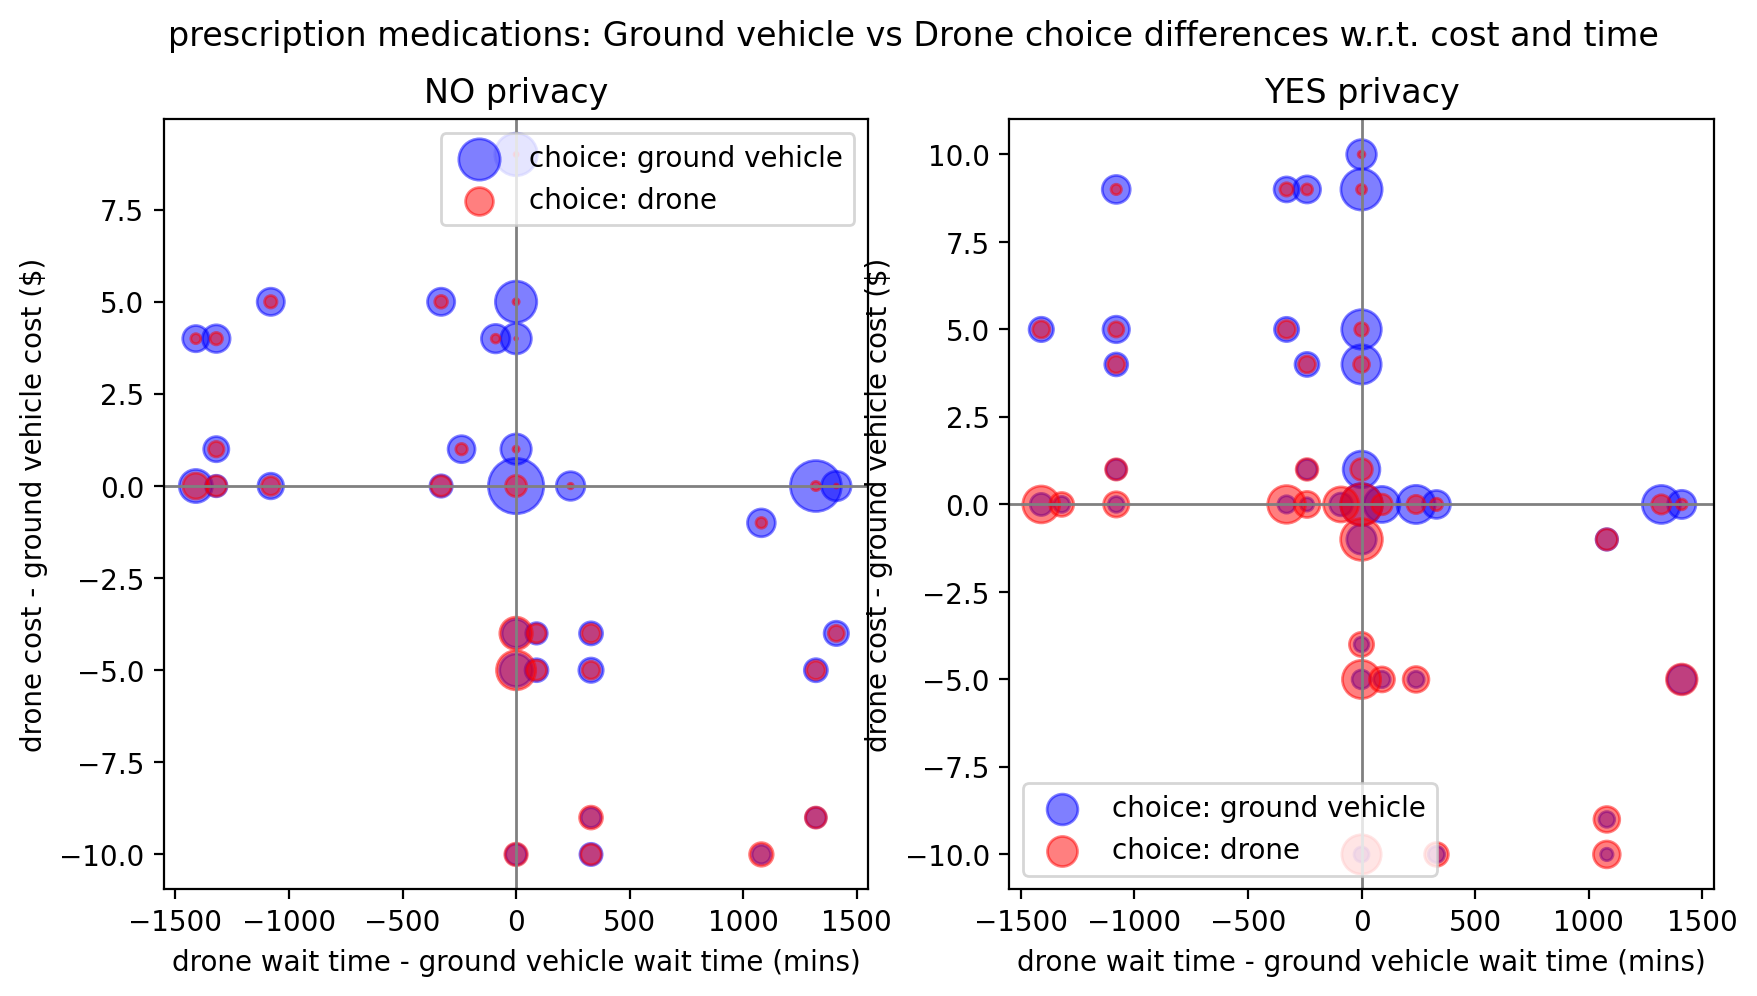

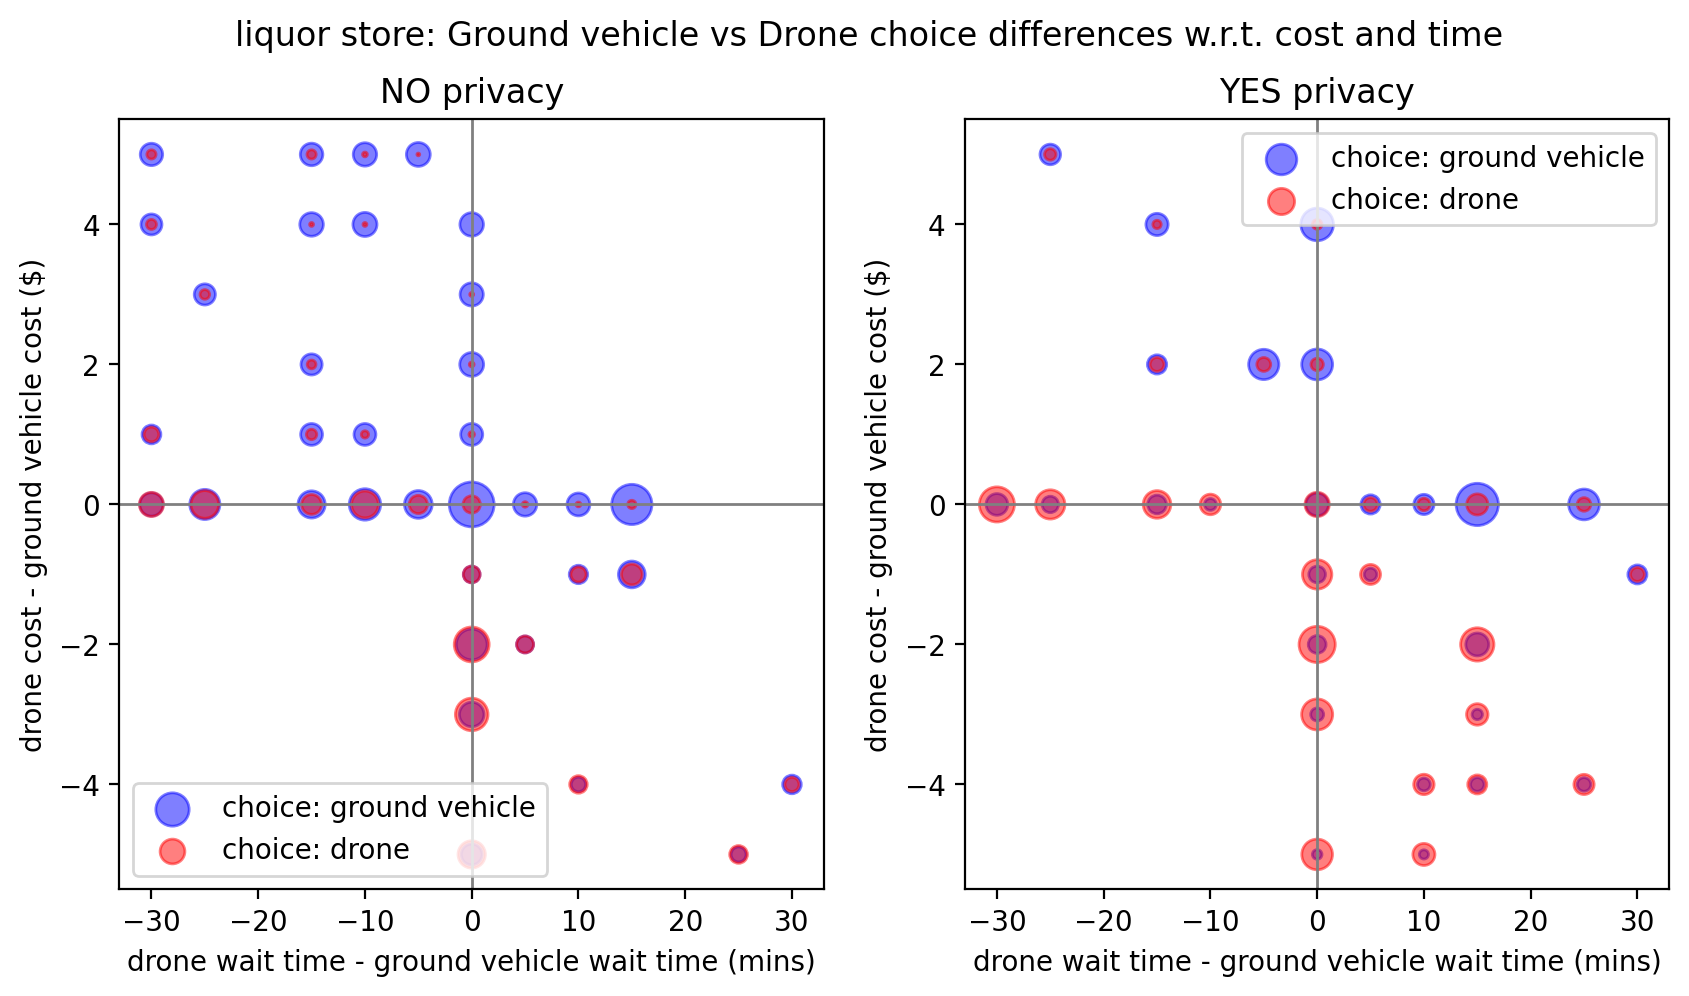

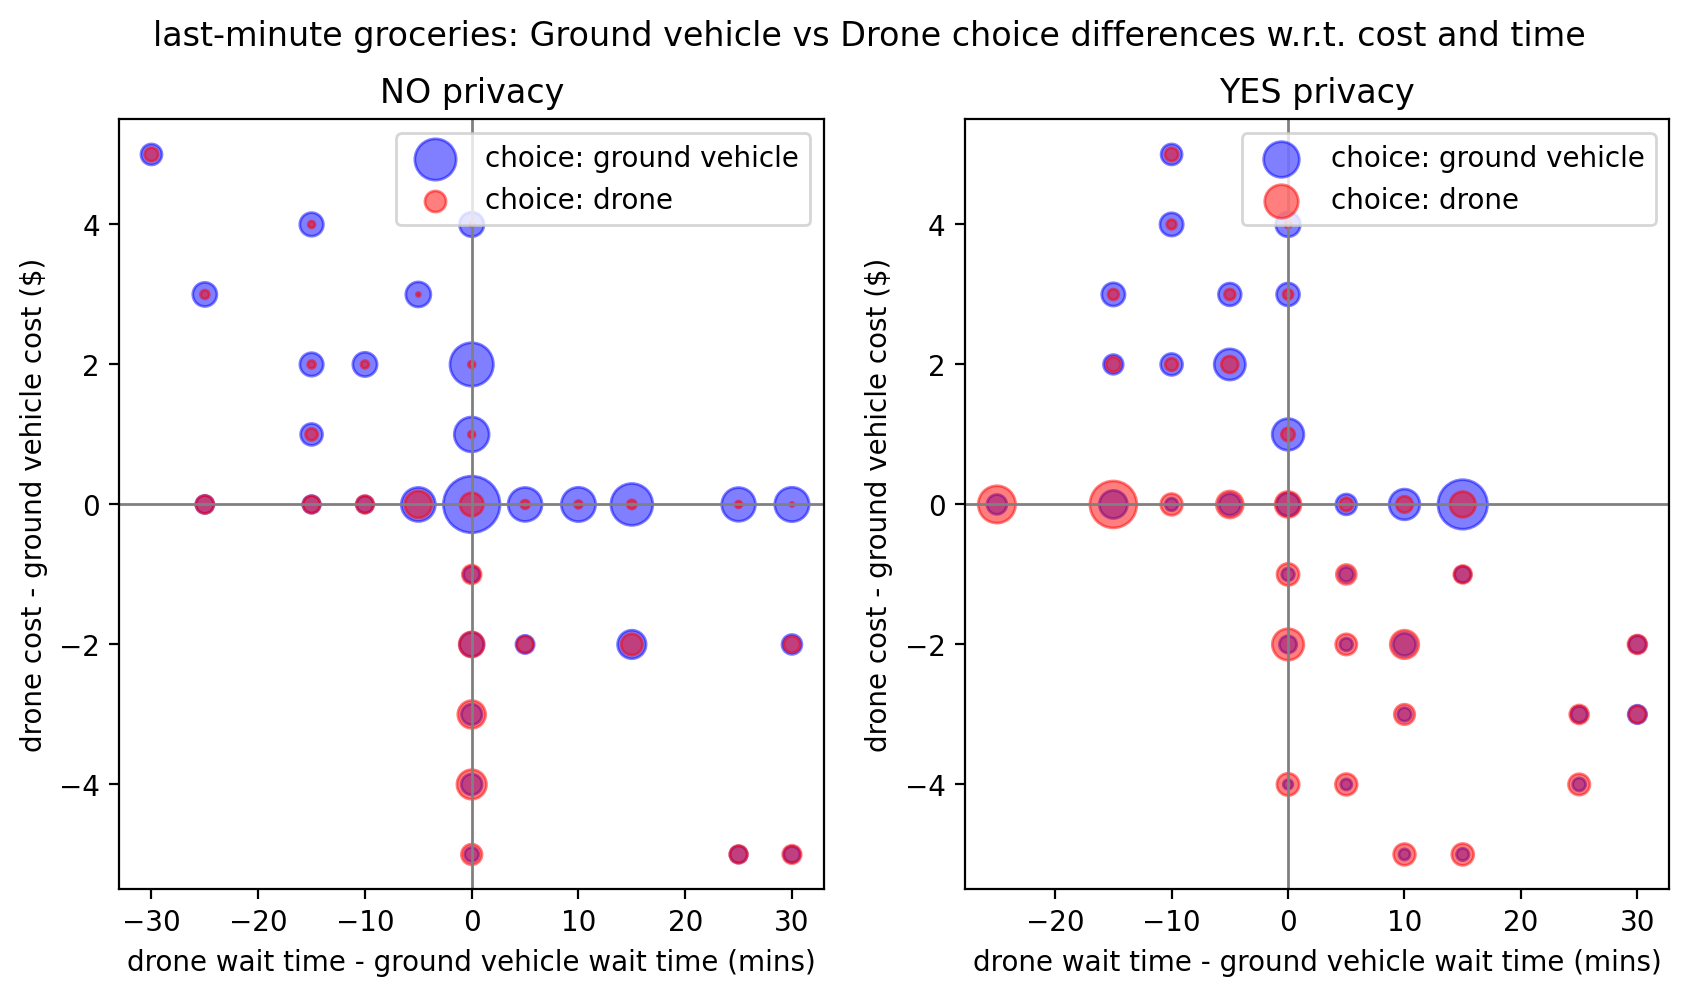

In [51]:
for v, vendor_type in enumerate(VENDOR_TYPES):
    vdf = choices_df[choices_df['v']==v]
    plot_points_tradeoff_by_size(vdf, vendor_type[0])

## Dummy models



In [43]:
from pymer4.models import Lmer

In [44]:
for v, vendor_type in enumerate(VENDOR_TYPES):
    print('\n-----------\nmodel for vendor type v%s: %s\n-----------\n' % (v, vendor_type[0]))
    v_choices_df = choices_df[choices_df['v']==v]
    # make d_time - g_time, d_cost - g_cost strings that can go in formula
    formula = 'choice ~ d_time_minus_g_time + d_cost_minus_g_cost + d_privacy + (1|ResponseId)'
    m = Lmer(formula, data=v_choices_df.rename(columns={
            'd_time - g_time':'d_time_minus_g_time',
            'd_cost - g_cost':'d_cost_minus_g_cost',
        }), family='binomial')
    print(m.fit())


-----------
model for vendor type v0: take-out food
-----------

Formula: choice~d_time_minus_g_time+d_cost_minus_g_cost+d_privacy+(1|ResponseId)

Family: binomial	 Inference: parametric

Number of observations: 9528	 Groups: {'ResponseId': 3014.0}

Log-likelihood: -4840.640 	 AIC: 9691.279

Random effects:

                   Name    Var    Std
ResponseId  (Intercept)  2.576  1.605

No random effect correlations specified

Fixed effects:

                     Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  \
(Intercept)            -1.566  -1.692   -1.440  0.064  0.209      0.184   
d_time_minus_g_time    -0.086  -0.093   -0.080  0.003  0.917      0.912   
d_cost_minus_g_cost    -0.724  -0.765   -0.683  0.021  0.485      0.465   
d_privacy               1.341   1.203    1.479  0.071  3.823      3.329   

                     OR_97.5_ci   Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  \
(Intercept)               0.237  0.173        0.156         0.192 -24.329   
d_time_minus_g_time      

#### Results overview:

- all parameter estimates have expected signs
- overall preference for ground vehicle vs drone is strong (seen in constant)
- Overall, parameter estimates are very similar for v0,v2,v3 (v1 needs to be debugged)
    - reminder: v1 (medications) had different attribute values
- privacy statistically siginificant and positive; slightly higher for v2 (liquor)
